In [1]:
import time
start = time.time()

In [2]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', 100)

In [3]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Lasso, Ridge

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [5]:
pd.options.display.max_columns = None

In [6]:
data = pd.read_csv('input/train.csv')

In [7]:
data.head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   
7  11993          74    2.0  80.312926         NaN            0.0     14   
8   5172           1    2.0  64.511437         NaN            1.0      9   
9   8649          23    1.0  46.461409   18.915552            8.0     13   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   
5        17.0       2011   0.309479         B         B        35      7715   
6         5.0       1960   0.460556         B         B        20      4386   
7         0.0       1977   0.075779         B         B         6      1437   
8        17.0       1977   0.007122         B         B         1       264   
9        17.0       2014   0.075779         B         B         6      1437   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644  
5         4         990.0            0        6       B  215898.447742  
6        14           NaN            1        5       B  296021.204377  
7         3           NaN            0        2       B  221244.156664  
8         0           NaN            0        1       B  229102.795999  
9         3           NaN            0        2       B   95380.220993

In [8]:
data.shape

(10000, 20)

In [9]:
data['Id'].nunique()

10000

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.4+ MB


#### Healthcare_1

In [11]:
data = data.drop('Healthcare_1', axis=1)

In [12]:
data.shape

(10000, 19)

#### describe

In [13]:
data.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3   Helthcare_2       Shops_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      24.687000   5352.157400      8.039200      1.319500      4.231300   
std       17.532614   4006.799803     23.831875      1.493601      4.806341   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000      0.000000      1.000000   
50%       25.000000   5285.000000      2.000000      1.000000      3.000000   
75%       36.000000   7227.000000      5.000000      2.000000      6.000000   
max       74.000000  19083.000000    141.000000      6.000000     23.000000   

               Price  
count   10000.000000  
mean   214138.857399  
std     92872.293865  
min     59174.778028  
25%    153872.633942  
50%    192269.644879  
75%    249135.462171  
max    633233.466570

#### HouseYear

In [14]:
2.005201e+07 == 2.005201 * 10 ** 7

True

In [15]:
2.005201 * 10 ** 7

20052010.0

In [16]:
data.loc[data['HouseYear'] > 2020, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
1497  10814         109    1.0  37.265070   20.239714            9.0      9   
4189  11607         147    2.0  44.791836   28.360393            5.0      4   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
1497        12.0   20052011   0.136330         B         B        30   
4189         9.0       4968   0.319809         B         B        25   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  
1497      6141        10            3        6       B  254084.534396  
4189      4756        16            5        8       B  243028.603096

In [17]:
data.loc[data['HouseYear'] == 20052011, 'HouseYear'] = 2008

In [18]:
data.loc[data['HouseYear'] == 4968, 'HouseYear'] = 1968

In [19]:
data.loc[data['HouseYear'] < 1900, :]

Empty DataFrame
Columns: [Id, DistrictId, Rooms, Square, LifeSquare, KitchenSquare, Floor, HouseFloor, HouseYear, Ecology_1, Ecology_2, Ecology_3, Social_1, Social_2, Social_3, Helthcare_2, Shops_1, Shops_2, Price]
Index: []

In [20]:
data['HouseYear'].describe()

count    10000.00000
mean      1984.86600
std         18.41187
min       1910.00000
25%       1974.00000
50%       1977.00000
75%       2001.00000
max       2020.00000
Name: HouseYear, dtype: float64

#### Rooms

In [21]:
data.Rooms.describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

In [22]:
data.loc[data['Rooms'] > 5, :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
377    5927          57   10.0  59.056975   36.223072           10.0     22   
1454   8491           1   19.0  42.006046   21.779288            7.0     17   
2170  14003          99    6.0  59.414334   38.702244            6.0      7   
8849  14865           9   10.0  60.871266   38.420681           10.0      3   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
377         22.0       2002   0.090799         B         B        74   
1454        17.0       2014   0.007122         B         B         1   
2170         9.0       1969   0.033494         B         B        66   
8849         2.0       1994   0.161532         B         B        25   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  
377      19083         2            5       15       B  317265.323792  
1454       264         0            0        1       B   78364.616704  
2170     10573         1            3        8       B  229661.964416  
8849      5648         1            2        4       B  172329.270863

In [23]:
data.loc[data['Id'].isin([5927, 14003, 14865]), 'Rooms'] = 2

In [24]:
data.loc[data['Id'] == 8491, 'Rooms'] = 1

#### Small Square, LifeSquare

In [25]:
data.loc[data['Square'] < 15, :].shape

(13, 19)

In [26]:
small_square_ids = data.loc[data['Square'] < 15, 'Id'].values
small_square_ids

array([ 1748, 11526, 10202, 10527,  9487, 12676,  3224,  4504, 14786,
       13265, 15744,  6782,  7657], dtype=int64)

In [27]:
data.loc[data['Id'].isin(small_square_ids), :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212    1748          88    2.0   5.497061   67.628717            1.0     24   
1316  11526          27    1.0   4.633498    1.969969            1.0     18   
1608  10202           6    1.0   2.596351    4.604943            1.0      3   
3280  10527          27    1.0   4.380726   40.805837            1.0     10   
3413   9487           5    1.0   5.129222    5.549458            1.0      1   
4739  12676          81    3.0  13.784865   15.988889            7.0      4   
4853   3224          27    0.0   2.377248    0.873147            0.0      1   
4900   4504          27    3.0   4.390331    5.610772            1.0      8   
6392  14786           1    1.0   1.136859    4.525736            1.0      3   
8030  13265           1    3.0   4.823679   79.767964            0.0      6   
8283  15744          34    1.0   1.988943    2.642219            1.0     21   
9294   6782          45    1.0   2.954309    5.257278            1.0      3   
9613   7657          38    1.0   4.502784    4.618547            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
212         22.0       1977   0.127376         B         B        43   
1316         1.0       1977   0.011654         B         B         4   
1608        25.0       2014   0.243205         B         B         5   
3280        17.0       2013   0.211401         B         B         9   
3413         1.0       1977   0.150818         B         B        16   
4739         5.0       1960   0.319809         B         B        25   
4853         0.0       1977   0.017647         B         B         2   
4900        19.0       2016   0.211401         B         B         9   
6392         1.0       1977   0.007122         B         B         1   
8030        17.0       1977   0.007122         B         B         1   
8283         4.0       1977   0.069753         B         B        53   
9294         1.0       1977   0.195781         B         B        23   
9613         1.0       1977   0.060753         B         B        15   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  
212       8429         3            3        9       B  412511.088764  
1316       915         0            0        0       B  107604.269441  
1608      1564         0            0        0       B  137597.601458  
3280      1892         0            0        1       B   97560.720383  
3413      3433         4            4        5       B  369472.403061  
4739      4756        16            5        8       B   78388.806186  
4853       469         0            0        0       B  126596.941798  
4900      1892         0            0        1       B  161379.067034  
6392       264         0            0        1       B  181434.825589  
8030       264         0            0        1       B  237716.681261  
8283     13670         4            1       11       B  458378.777006  
9294      5212         6            3        2       B  438005.182323  
9613      2787         2            0        7       B  483283.488083

In [28]:
mean_square = data.groupby('Rooms', as_index=False)[['Square']].mean().rename(columns={'Square': 'mean_square'})
mean_square

Rooms  mean_square
0    0.0    81.620358
1    1.0    41.323462
2    2.0    56.790526
3    3.0    76.903234
4    4.0    98.377544
5    5.0   122.614941

In [29]:
data = pd.merge(data, mean_square, on='Rooms', how='left')

In [30]:
data.shape

(10000, 20)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
mean_square      10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [32]:
data.head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   
7  11993          74    2.0  80.312926         NaN            0.0     14   
8   5172           1    2.0  64.511437         NaN            1.0      9   
9   8649          23    1.0  46.461409   18.915552            8.0     13   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   
5        17.0       2011   0.309479         B         B        35      7715   
6         5.0       1960   0.460556         B         B        20      4386   
7         0.0       1977   0.075779         B         B         6      1437   
8        17.0       1977   0.007122         B         B         1       264   
9        17.0       2014   0.075779         B         B         6      1437   

   Social_3  Helthcare_2  Shops_1 Shops_2          Price  mean_square  
0         5            0       11       B  184966.930730    56.790526  
1         1            1       16       B  300009.450063    76.903234  
2         0            1        3       B  220925.908524    56.790526  
3         3            0        5       B  175616.227217    56.790526  
4         1            2        4       B  150226.531644    41.323462  
5         4            0        6       B  215898.447742    76.903234  
6        14            1        5       B  296021.204377    56.790526  
7         3            0        2       B  221244.156664    56.790526  
8         0            0        1       B  229102.795999    56.790526  
9         3            0        2       B   95380.220993    41.323462

In [33]:
data.loc[data['Id'].isin(small_square_ids), 'Square'] = data['mean_square']

In [34]:
data.loc[data['Id'].isin(small_square_ids), :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212    1748          88    2.0  56.790526   67.628717            1.0     24   
1316  11526          27    1.0  41.323462    1.969969            1.0     18   
1608  10202           6    1.0  41.323462    4.604943            1.0      3   
3280  10527          27    1.0  41.323462   40.805837            1.0     10   
3413   9487           5    1.0  41.323462    5.549458            1.0      1   
4739  12676          81    3.0  76.903234   15.988889            7.0      4   
4853   3224          27    0.0  81.620358    0.873147            0.0      1   
4900   4504          27    3.0  76.903234    5.610772            1.0      8   
6392  14786           1    1.0  41.323462    4.525736            1.0      3   
8030  13265           1    3.0  76.903234   79.767964            0.0      6   
8283  15744          34    1.0  41.323462    2.642219            1.0     21   
9294   6782          45    1.0  41.323462    5.257278            1.0      3   
9613   7657          38    1.0  41.323462    4.618547            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
212         22.0       1977   0.127376         B         B        43   
1316         1.0       1977   0.011654         B         B         4   
1608        25.0       2014   0.243205         B         B         5   
3280        17.0       2013   0.211401         B         B         9   
3413         1.0       1977   0.150818         B         B        16   
4739         5.0       1960   0.319809         B         B        25   
4853         0.0       1977   0.017647         B         B         2   
4900        19.0       2016   0.211401         B         B         9   
6392         1.0       1977   0.007122         B         B         1   
8030        17.0       1977   0.007122         B         B         1   
8283         4.0       1977   0.069753         B         B        53   
9294         1.0       1977   0.195781         B         B        23   
9613         1.0       1977   0.060753         B         B        15   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  \
212       8429         3            3        9       B  412511.088764   
1316       915         0            0        0       B  107604.269441   
1608      1564         0            0        0       B  137597.601458   
3280      1892         0            0        1       B   97560.720383   
3413      3433         4            4        5       B  369472.403061   
4739      4756        16            5        8       B   78388.806186   
4853       469         0            0        0       B  126596.941798   
4900      1892         0            0        1       B  161379.067034   
6392       264         0            0        1       B  181434.825589   
8030       264         0            0        1       B  237716.681261   
8283     13670         4            1       11       B  458378.777006   
9294      5212         6            3        2       B  438005.182323   
9613      2787         2            0        7       B  483283.488083   

      mean_square  
212     56.790526  
1316    41.323462  
1608    41.323462  
3280    41.323462  
3413    41.323462  
4739    76.903234  
4853    81.620358  
4900    76.903234  
6392    41.323462  
8030    76.903234  
8283    41.323462  
9294    41.323462  
9613    41.323462

In [35]:
data.loc[data['Id'].isin(small_square_ids), 'LifeSquare'] = data['Square']

In [36]:
data.loc[data['Id'].isin(small_square_ids), :]

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
212    1748          88    2.0  56.790526   56.790526            1.0     24   
1316  11526          27    1.0  41.323462   41.323462            1.0     18   
1608  10202           6    1.0  41.323462   41.323462            1.0      3   
3280  10527          27    1.0  41.323462   41.323462            1.0     10   
3413   9487           5    1.0  41.323462   41.323462            1.0      1   
4739  12676          81    3.0  76.903234   76.903234            7.0      4   
4853   3224          27    0.0  81.620358   81.620358            0.0      1   
4900   4504          27    3.0  76.903234   76.903234            1.0      8   
6392  14786           1    1.0  41.323462   41.323462            1.0      3   
8030  13265           1    3.0  76.903234   76.903234            0.0      6   
8283  15744          34    1.0  41.323462   41.323462            1.0     21   
9294   6782          45    1.0  41.323462   41.323462            1.0      3   
9613   7657          38    1.0  41.323462   41.323462            1.0     28   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
212         22.0       1977   0.127376         B         B        43   
1316         1.0       1977   0.011654         B         B         4   
1608        25.0       2014   0.243205         B         B         5   
3280        17.0       2013   0.211401         B         B         9   
3413         1.0       1977   0.150818         B         B        16   
4739         5.0       1960   0.319809         B         B        25   
4853         0.0       1977   0.017647         B         B         2   
4900        19.0       2016   0.211401         B         B         9   
6392         1.0       1977   0.007122         B         B         1   
8030        17.0       1977   0.007122         B         B         1   
8283         4.0       1977   0.069753         B         B        53   
9294         1.0       1977   0.195781         B         B        23   
9613         1.0       1977   0.060753         B         B        15   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  \
212       8429         3            3        9       B  412511.088764   
1316       915         0            0        0       B  107604.269441   
1608      1564         0            0        0       B  137597.601458   
3280      1892         0            0        1       B   97560.720383   
3413      3433         4            4        5       B  369472.403061   
4739      4756        16            5        8       B   78388.806186   
4853       469         0            0        0       B  126596.941798   
4900      1892         0            0        1       B  161379.067034   
6392       264         0            0        1       B  181434.825589   
8030       264         0            0        1       B  237716.681261   
8283     13670         4            1       11       B  458378.777006   
9294      5212         6            3        2       B  438005.182323   
9613      2787         2            0        7       B  483283.488083   

      mean_square  
212     56.790526  
1316    41.323462  
1608    41.323462  
3280    41.323462  
3413    41.323462  
4739    76.903234  
4853    81.620358  
4900    76.903234  
6392    41.323462  
8030    76.903234  
8283    41.323462  
9294    41.323462  
9613    41.323462

#### Large Square, LifeSquare

In [37]:
large_square_ids = data.loc[data['Square'] > 150, 'Id'].values

In [38]:
large_square_ids

array([ 3718, 11055,  5602,  7917,  5548,  5621, 14556, 16204,  6674,
        5300, 15362,    28, 13434,  2307, 15947, 14181, 10678,  3914,
       11602,  5376,  3233,  4991,  4249, 11764,  2603, 16568],
      dtype=int64)

In [39]:
data.loc[data['Square'] > 150, :].head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
652    3718          56    3.0  190.857689  107.376164           19.0      7   
1641  11055         151    1.0  174.649522  174.837082           15.0     10   
1812   5602          93    3.0  169.385184         NaN            1.0      2   
1981   7917          27    0.0  212.932361  211.231125            0.0      2   
1982   5548          86    5.0  275.645284  233.949309           26.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
652          3.0       2007   0.000000         B         B        23   
1641        12.0       1958   0.236108         B         B        16   
1812        10.0       1977   0.004949         B         B         0   
1981         3.0       2008   0.211401         B         B         9   
1982        37.0       2011   0.161976         B         A        31   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  \
652       5067         4            2        6       B  338644.075979   
1641      3893        27            3       10       B  232766.187698   
1812       186         0            0        0       B  190949.293998   
1981      1892         0            0        1       B  302211.260887   
1982      7010         5            3        7       B  455264.882666   

      mean_square  
652     76.903234  
1641    41.323462  
1812    76.903234  
1981    81.620358  
1982   122.614941

In [40]:
data.loc[data['Id'].isin(large_square_ids), 'Square'] = data['mean_square']

In [41]:
data.loc[data['Id'].isin(large_square_ids), 'LifeSquare'] = data['Square']

In [42]:
data.loc[data['Id'].isin(large_square_ids), :].head()

Id  DistrictId  Rooms      Square  LifeSquare  KitchenSquare  Floor  \
652    3718          56    3.0   76.903234   76.903234           19.0      7   
1641  11055         151    1.0   41.323462   41.323462           15.0     10   
1812   5602          93    3.0   76.903234   76.903234            1.0      2   
1981   7917          27    0.0   81.620358   81.620358            0.0      2   
1982   5548          86    5.0  122.614941  122.614941           26.0     12   

      HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
652          3.0       2007   0.000000         B         B        23   
1641        12.0       1958   0.236108         B         B        16   
1812        10.0       1977   0.004949         B         B         0   
1981         3.0       2008   0.211401         B         B         9   
1982        37.0       2011   0.161976         B         A        31   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  \
652       5067         4            2        6       B  338644.075979   
1641      3893        27            3       10       B  232766.187698   
1812       186         0            0        0       B  190949.293998   
1981      1892         0            0        1       B  302211.260887   
1982      7010         5            3        7       B  455264.882666   

      mean_square  
652     76.903234  
1641    41.323462  
1812    76.903234  
1981    81.620358  
1982   122.614941

#### Ecology_2

In [43]:
data['Ecology_2'].unique()

array(['B', 'A'], dtype=object)

In [44]:
data['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [45]:
data['Ecology_2'] = (data['Ecology_2'] == 'B').astype(int)

In [46]:
data['Ecology_2'].value_counts(normalize=True)

1    0.9903
0    0.0097
Name: Ecology_2, dtype: float64

#### fillna LifeSquare

In [47]:
data['LifeSquare'].describe()

count    7894.000000
mean       37.040670
std        85.706039
min         0.370619
25%        22.816724
50%        32.820716
75%        45.148189
max      7480.592129
Name: LifeSquare, dtype: float64

In [48]:
data['Square'].describe()

count    10000.000000
mean        56.006869
std         18.179331
min         16.117154
25%         41.774881
50%         52.513310
75%         65.889256
max        148.671938
Name: Square, dtype: float64

In [49]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Square'])

In [50]:
data['LifeSquare'].describe()

count    10000.000000
mean        41.831217
std         77.188316
min          0.370619
25%         25.626945
50%         37.596891
75%         50.080478
max       7480.592129
Name: LifeSquare, dtype: float64

In [51]:
data.loc[data['LifeSquare'] > data['Square'], :].shape

(466, 20)

In [52]:
data.loc[data['LifeSquare'] > data['Square'], 'LifeSquare'] = data['Square']

In [53]:
data['LifeSquare'].describe()

count    10000.000000
mean        40.942674
std         19.919187
min          0.370619
25%         25.626945
50%         37.536618
75%         49.948884
max        148.179026
Name: LifeSquare, dtype: float64

#### Floor

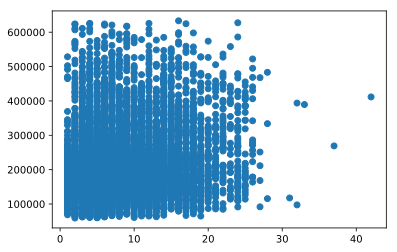

In [54]:
plt.scatter(data['Floor'], data['Price']);

In [55]:
data[data['Floor'] > 30].head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
339   11563           8    1.0  50.390862   41.642898            0.0     32   
2781   1674          76    2.0  74.344672   41.044132            5.0     42   
3330   3298          31    1.0  57.551691   21.551876           10.0     32   
4323   6589          30    1.0  62.110823   52.812128            4.0     31   
6755   8296         146    1.0  86.386754   71.904999            0.0     37   

      HouseFloor  HouseYear  Ecology_1  Ecology_2 Ecology_3  Social_1  \
339         32.0       2008   0.092291          1         B        21   
2781        48.0       2016   0.000000          1         B         7   
3330        40.0       1977   0.151346          1         A        32   
4323        44.0       2009   0.000078          1         B        22   
6755        38.0       2012   0.236108          1         B        16   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  \
339       4346         2            1        2       B   97480.845791   
2781      1660        39            1        5       B  411691.504766   
3330      5889        10            4        1       B  393799.531732   
4323      6398       141            3       23       B  117647.461002   
6755      3893        27            3       10       B  269113.584248   

      mean_square  
339     41.323462  
2781    56.790526  
3330    41.323462  
4323    41.323462  
6755    41.323462

#### HouseFloor

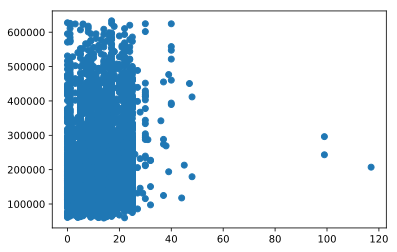

In [56]:
plt.scatter(data['HouseFloor'], data['Price']);

In [57]:
data[data['HouseFloor'] > 80].head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
6131  10806           5    1.0  51.944587   48.709601            1.0      6   
8599   9300          74    2.0  71.747869   71.747869            9.0      5   
8854     78          30    2.0  65.773749   65.773749            1.0      8   

      HouseFloor  HouseYear  Ecology_1  Ecology_2 Ecology_3  Social_1  \
6131        99.0       1977   0.150818          1         B        16   
8599        99.0       1977   0.075779          1         B         6   
8854       117.0       1977   0.000078          1         B        22   

      Social_2  Social_3  Helthcare_2  Shops_1 Shops_2          Price  \
6131      3433         4            4        5       B  296127.115515   
8599      1437         3            0        2       B  243329.912579   
8854      6398       141            3       23       B  207248.370520   

      mean_square  
6131    41.323462  
8599    56.790526  
8854    56.790526

In [58]:
# mean_house_floor = data[data['HouseFloor'] > 80]
# data[data['HouseFloor'] > 80]['HouseFloor'] =\
#     data[(data['HouseFloor'] <= 80) & data['HouseYear']]['HouseFloor'].mean()

mean_house_floor = data.loc[(data['HouseFloor'] <= 80) & (data['HouseYear'] == 1977)]['HouseFloor'].mean()
data.loc[data['HouseFloor'] > 80, 'HouseFloor'] = mean_house_floor


In [59]:
assert np.int(data[data.index == 6131]['HouseFloor']) <= 80

In [60]:
data.min()

Id                      0
DistrictId              0
Rooms                   0
Square            16.1172
LifeSquare       0.370619
KitchenSquare           0
Floor                   1
HouseFloor              0
HouseYear            1910
Ecology_1               0
Ecology_2               0
Ecology_3               A
Social_1                0
Social_2              168
Social_3                0
Helthcare_2             0
Shops_1                 0
Shops_2                 A
Price             59174.8
mean_square       41.3235
dtype: object

In [61]:
len(data[(data['HouseYear'] == 1977) & (data['HouseFloor'] <= 1)])

580

In [62]:
# feat = 'HouseFloor'
# year = 1977

# min_year = np.int(data['HouseYear'].min())
# max_year = np.int(data['HouseYear'].max())
# display((min_year, max_year))

# for year in np.sort(data['HouseYear'].unique()):
#     if year < 1964:
#         continue
#     data_year = data[data['HouseYear'] == year]
#     data_year_2 = data[(data['HouseYear'] == year) & (data['Floor'] > data['HouseFloor'])]
#     plt.scatter(data_year[feat], data_year['Price'], zorder=2);
#     plt.scatter(data_year_2[feat], data_year_2['Price'], zorder=2);
    
#     min_hf = np.int(data[data['HouseYear'] == year][feat].min())
#     max_hf = np.int(data[data['HouseYear'] == year][feat].max() + 0.99)
    
#     plt.xticks(range(min_hf, max_hf))
#     plt.gca().xaxis.grid(True)
#     plt.gcf().set_size_inches(11, 3)
#     plt.title(year)
#     plt.show()

In [63]:
data.loc[data['Floor'] > data['HouseFloor'],
     ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear']]

Rooms      Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
7       2.0   80.312926   80.312926            0.0     14         0.0   
14      1.0   53.769097   52.408027            1.0      5         4.0   
16      2.0   49.360648   31.993964            5.0      6         5.0   
21      2.0   64.711835   64.711835            1.0     15         1.0   
23      3.0  118.907612  118.907612            0.0      2         0.0   
26      3.0  106.958871    0.641822            0.0     17         0.0   
35      3.0   85.280389   58.447967            9.0      6         5.0   
39      2.0   60.503248   60.503248            0.0     16         0.0   
44      3.0  104.211396  104.211396            0.0     20         0.0   
51      1.0   35.280894   23.354176            6.0     11         9.0   
65      1.0   41.194188   41.194188            0.0      6         0.0   
67      2.0   45.964890   29.141212            5.0      7         5.0   
68      1.0   42.678844   23.918634            8.0     14        12.0   
70      2.0   79.227049   79.227049            0.0      9         0.0   
72      1.0   52.457589   52.423345            0.0     18        17.0   
76      1.0   47.909327   42.782385            1.0      2         1.0   
86      3.0  127.481583  127.481583            1.0     16         1.0   
87      2.0   47.145626   30.738284            5.0     11         9.0   
95      2.0   61.334968    4.091945            1.0     26         1.0   
104     2.0   62.347154   62.347154            1.0      6         1.0   
115     2.0   60.445855   60.445855            1.0     13         1.0   
119     1.0   42.367289   40.012529            1.0     16        14.0   
122     1.0   43.444266   20.702409            8.0     18        17.0   
123     3.0   85.952306   85.952306            1.0      4         3.0   
129     1.0   65.102017   64.622603            1.0     10         9.0   
131     3.0   89.692964   87.623814            1.0     13         1.0   
141     3.0   78.471987   52.706824            8.0      6         5.0   
145     2.0   60.366626   57.709149           10.0     20        19.0   
152     2.0   57.699619   57.699619           10.0      2         1.0   
153     1.0   51.831473   51.831473            1.0      5         1.0   
...     ...         ...         ...            ...    ...         ...   
9837    2.0   48.185943   33.156377            7.0      9         8.0   
9847    1.0   36.298652   20.959605            6.0      7         5.0   
9852    4.0  117.201937   69.898092           14.0      4         2.0   
9853    2.0   48.406418   30.717760            5.0     13        12.0   
9869    2.0   57.284603   34.599765            7.0      6         5.0   
9870    1.0   37.551366   37.551366            1.0     11         1.0   
9871    1.0   41.783808   41.783808            1.0     17         1.0   
9872    1.0   43.711302   20.130061            8.0     18        17.0   
9878    2.0   71.985335   71.985335            0.0      5         0.0   
9908    1.0   35.873961   35.873961            0.0     25         0.0   
9917    1.0   45.822669   45.822669            1.0      7         1.0   
9924    1.0   41.093702   20.643619            8.0     18        17.0   
9931    2.0   64.261856   64.261856            1.0     10         1.0   
9938    2.0   64.412326   61.337938            1.0     13         1.0   
9942    2.0   56.323990   56.323990            1.0     18        17.0   
9944    2.0   60.396765   60.396765            0.0     10         0.0   
9949    1.0   39.211416   36.159431            1.0     19        18.0   
9951    1.0   33.516313   31.086243            1.0     13        11.0   
9954    3.0   84.250710    4.187885            1.0     15         1.0   
9958    1.0   39.143939   22.650690            8.0     14        12.0   
9959    1.0   32.416925   19.257869            6.0      6         5.0   
9962    2.0   63.131655   41.867913            8.0      9         8.0   
9971    2.0   58.629682   36.330029            9.0     19       

In [64]:
def add_mean_column(feat):
    global data
    
    new_feat = 'Mean_' + feat
    data_stat1 = data.groupby([feat, 'Rooms'], as_index=False)[['Price']]\
        .mean().rename(columns={'Price': new_feat})
    data = pd.merge(data, data_stat1, on=[feat, 'Rooms'], how='left')
    
    new_feat = 'Med_' + feat
    data_stat1 = data.groupby([feat, 'Rooms'], as_index=False)[['Price']]\
        .median().rename(columns={'Price': new_feat})
    data = pd.merge(data, data_stat1, on=[feat, 'Rooms'], how='left')

In [65]:
add_mean_column('DistrictId')
add_mean_column('Floor')
add_mean_column('HouseFloor')
add_mean_column('HouseYear')
add_mean_column('Social_3')
add_mean_column('Helthcare_2')
add_mean_column('Shops_1')

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 34 columns):
Id                  10000 non-null int64
DistrictId          10000 non-null int64
Rooms               10000 non-null float64
Square              10000 non-null float64
LifeSquare          10000 non-null float64
KitchenSquare       10000 non-null float64
Floor               10000 non-null int64
HouseFloor          10000 non-null float64
HouseYear           10000 non-null int64
Ecology_1           10000 non-null float64
Ecology_2           10000 non-null int32
Ecology_3           10000 non-null object
Social_1            10000 non-null int64
Social_2            10000 non-null int64
Social_3            10000 non-null int64
Helthcare_2         10000 non-null int64
Shops_1             10000 non-null int64
Shops_2             10000 non-null object
Price               10000 non-null float64
mean_square         10000 non-null float64
Mean_DistrictId     10000 non-null float64
Med_Distric

In [67]:
data['FloorRev'] = data['HouseFloor'] - data['Floor']
add_mean_column('FloorRev')

In [68]:
data['FloorError'] = (data['Floor'] > data['HouseFloor']).astype(int)

In [69]:
data.head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   
7  11993          74    2.0  80.312926   80.312926            0.0     14   
8   5172           1    2.0  64.511437   64.511437            1.0      9   
9   8649          23    1.0  46.461409   18.915552            8.0     13   

   HouseFloor  HouseYear  Ecology_1  Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040          1         B        33      7976   
1         9.0       1978   0.000070          1         B        46     10309   
2        12.0       1968   0.049637          1         B        34      7759   
3        17.0       1977   0.437885          1         B        23      5735   
4        12.0       1976   0.012339          1         B        35      5776   
5        17.0       2011   0.309479          1         B        35      7715   
6         5.0       1960   0.460556          1         B        20      4386   
7         0.0       1977   0.075779          1         B         6      1437   
8        17.0       1977   0.007122          1         B         1       264   
9        17.0       2014   0.075779          1         B         6      1437   

   Social_3  Helthcare_2  Shops_1 Shops_2          Price  mean_square  \
0         5            0       11       B  184966.930730    56.790526   
1         1            1       16       B  300009.450063    76.903234   
2         0            1        3       B  220925.908524    56.790526   
3         3            0        5       B  175616.227217    56.790526   
4         1            2        4       B  150226.531644    41.323462   
5         4            0        6       B  215898.447742    76.903234   
6        14            1        5       B  296021.204377    56.790526   
7         3            0        2       B  221244.156664    56.790526   
8         0            0        1       B  229102.795999    56.790526   
9         3            0        2       B   95380.220993    41.323462   

   Mean_DistrictId  Med_DistrictId     Mean_Floor      Med_Floor  \
0    213160.076297   207786.135836  218270.298481  201543.142594   
1    303643.563728   300009.450063  295811.569762  272724.581327   
2    259938.729121   263206.223152  219421.883789  211768.371011   
3    172368.882269   166809.665642  219421.883789  211768.371011   
4    155748.415754   158539.052715  161505.304284  151461.122512   
5    400943.021226   466753.618497  287178.737071  264709.549033   
6    253795.661825   234421.454601  192305.343292  188071.915542   
7    236250.931918   243031.695525  227274.427710  204583.823035   
8    198777.278269   202706.090239  213238.569280  204126.847689   
9    100961.810824   102069.270740  163502.170657  157534.251718   

   Mean_HouseFloor  Med_HouseFloor  Mean_HouseYear  Med_HouseYear  \
0    205284.081368   200409.664341   196197.638076  195222.695275   
1    253801.502048   244577.362098   274005.901466  268711.924550   
2    210406.997916   211560.572108   201183.190845  197287.354681   
3    206780.946416   189130.069449   188954.114564  182395.443963   
4    168073.796272   169272.712182   170534.786934  167850.178678   
5    282951.555168   255658.555074   256068.055898  221296.544852   
6    197127.210562   189475.512032   234683.958943  220038.934605   
7    216541.195097   188122.211003   188954.114564  182395.443963   
8    206780.946416   189130.069449   188954.114564  182395.443963   
9    148737.022819   138139.165831   139800.0

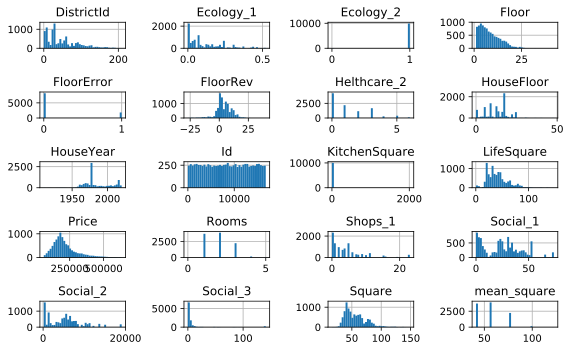

In [70]:
feats1 = list(filter(lambda s: s[0:5] != 'Mean_' and s[0:4] != 'Med_', data.columns))
data1 = pd.DataFrame(data, columns=feats1)

data1.hist(bins=40, figsize=(8, 5), zorder=2)
plt.tight_layout()
plt.xlabel('', fontsize=4);

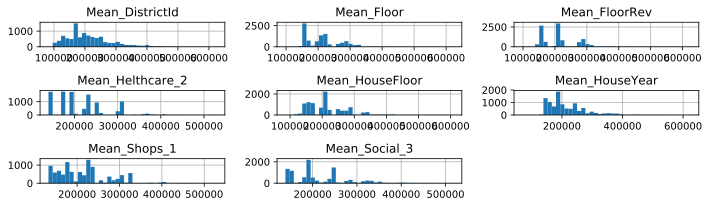

In [71]:
feats2 = list(filter(lambda s: s[0:5] == 'Mean_', data.columns))
data2 = pd.DataFrame(data, columns=feats2)

data2.hist(bins=40, figsize=(10, 3), zorder=2)
plt.tight_layout()
plt.xlabel('', fontsize=4);

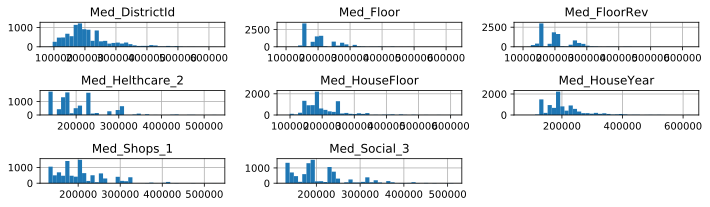

In [72]:
feats3 = list(filter(lambda s: s[0:4] == 'Med_', data.columns))
data3 = pd.DataFrame(data, columns=feats3)

data3.hist(bins=40, figsize=(10, 3), zorder=2)
plt.tight_layout()
plt.xlabel('', fontsize=4);

In [73]:
def print_unique():
    for feat in data.columns:
        nunique = data[feat].nunique()
        print(f'{feat:15} {nunique:5}', end='')
        unique = '[...]'
        if nunique <= 25:
            unique = data[feat].unique()
            unique.sort()
        print('    ', end='')
        print(unique)

In [74]:
print_unique()

Id              10000    [...]
DistrictId        205    [...]
Rooms               6    [0. 1. 2. 3. 4. 5.]
Square           9967    [...]
LifeSquare       9967    [...]
KitchenSquare      58    [...]
Floor              33    [...]
HouseFloor         43    [...]
HouseYear          95    [...]
Ecology_1         129    [...]
Ecology_2           2    [0 1]
Ecology_3           2    ['A' 'B']
Social_1           51    [...]
Social_2          142    [...]
Social_3           30    [...]
Helthcare_2         7    [0 1 2 3 4 5 6]
Shops_1            16    [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 19 23]
Shops_2             2    ['A' 'B']
Price           10000    [...]
mean_square         6    [ 41.32346172  56.79052572  76.90323406  81.62035809  98.37754356
 122.61494139]
Mean_DistrictId   671    [...]
Med_DistrictId    671    [...]
Mean_Floor        132    [...]
Med_Floor         132    [...]
Mean_HouseFloor   149    [...]
Med_HouseFloor    149    [...]
Mean_HouseYear    329    [...]
Med_HouseYea

In [75]:
def _ab_to_01(feat):
    try:
        data[feat] = data[feat].replace(['A', 'B'], [0, 1])
    except:
        pass

In [76]:
_ab_to_01('Ecology_2')
_ab_to_01('Ecology_3')
_ab_to_01('Shops_2')

In [77]:
print_unique()

Id              10000    [...]
DistrictId        205    [...]
Rooms               6    [0. 1. 2. 3. 4. 5.]
Square           9967    [...]
LifeSquare       9967    [...]
KitchenSquare      58    [...]
Floor              33    [...]
HouseFloor         43    [...]
HouseYear          95    [...]
Ecology_1         129    [...]
Ecology_2           2    [0 1]
Ecology_3           2    [0 1]
Social_1           51    [...]
Social_2          142    [...]
Social_3           30    [...]
Helthcare_2         7    [0 1 2 3 4 5 6]
Shops_1            16    [ 0  1  2  3  4  5  6  7  8  9 10 11 15 16 19 23]
Shops_2             2    [0 1]
Price           10000    [...]
mean_square         6    [ 41.32346172  56.79052572  76.90323406  81.62035809  98.37754356
 122.61494139]
Mean_DistrictId   671    [...]
Med_DistrictId    671    [...]
Mean_Floor        132    [...]
Med_Floor         132    [...]
Mean_HouseFloor   149    [...]
Med_HouseFloor    149    [...]
Mean_HouseYear    329    [...]
Med_HouseYear     32

In [78]:
data.head(10)

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   
5  12915          59    3.0  80.384479   46.683720           12.0      5   
6  14549         154    2.0  62.254114   37.160377            7.0      3   
7  11993          74    2.0  80.312926   80.312926            0.0     14   
8   5172           1    2.0  64.511437   64.511437            1.0      9   
9   8649          23    1.0  46.461409   18.915552            8.0     13   

   HouseFloor  HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040          1          1        33      7976   
1         9.0       1978   0.000070          1          1        46     10309   
2        12.0       1968   0.049637          1          1        34      7759   
3        17.0       1977   0.437885          1          1        23      5735   
4        12.0       1976   0.012339          1          1        35      5776   
5        17.0       2011   0.309479          1          1        35      7715   
6         5.0       1960   0.460556          1          1        20      4386   
7         0.0       1977   0.075779          1          1         6      1437   
8        17.0       1977   0.007122          1          1         1       264   
9        17.0       2014   0.075779          1          1         6      1437   

   Social_3  Helthcare_2  Shops_1  Shops_2          Price  mean_square  \
0         5            0       11        1  184966.930730    56.790526   
1         1            1       16        1  300009.450063    76.903234   
2         0            1        3        1  220925.908524    56.790526   
3         3            0        5        1  175616.227217    56.790526   
4         1            2        4        1  150226.531644    41.323462   
5         4            0        6        1  215898.447742    76.903234   
6        14            1        5        1  296021.204377    56.790526   
7         3            0        2        1  221244.156664    56.790526   
8         0            0        1        1  229102.795999    56.790526   
9         3            0        2        1   95380.220993    41.323462   

   Mean_DistrictId  Med_DistrictId     Mean_Floor      Med_Floor  \
0    213160.076297   207786.135836  218270.298481  201543.142594   
1    303643.563728   300009.450063  295811.569762  272724.581327   
2    259938.729121   263206.223152  219421.883789  211768.371011   
3    172368.882269   166809.665642  219421.883789  211768.371011   
4    155748.415754   158539.052715  161505.304284  151461.122512   
5    400943.021226   466753.618497  287178.737071  264709.549033   
6    253795.661825   234421.454601  192305.343292  188071.915542   
7    236250.931918   243031.695525  227274.427710  204583.823035   
8    198777.278269   202706.090239  213238.569280  204126.847689   
9    100961.810824   102069.270740  163502.170657  157534.251718   

   Mean_HouseFloor  Med_HouseFloor  Mean_HouseYear  Med_HouseYear  \
0    205284.081368   200409.664341   196197.638076  195222.695275   
1    253801.502048   244577.362098   274005.901466  268711.924550   
2    210406.997916   211560.572108   201183.190845  197287.354681   
3    206780.946416   189130.069449   188954.114564  182395.443963   
4    168073.796272   169272.712182   170534.786934  167850.178678   
5    282951.555168   255658.555074   256068.055898  221296.544852   
6    197127.210562   189475.512032   234683.958943  220038.934605   
7    216541.195097   188122.211003   188954.114564  182395.443963   
8    206780.946416   189130.069449   188954.114564  182395.443963   
9    148737.022819   13

In [79]:
# data.loc[data['HouseFloor'] == 0]
mean_house_floor = data.loc[data['HouseFloor'] != 0]['HouseFloor'].mean()
data.loc[data['HouseFloor'] == 0] = mean_house_floor

In [80]:
data['FloorK'] = data['Floor'] / data['HouseFloor']
data['FloorK'].describe()

count    10000.000000
mean         1.108379
std          2.339316
min          0.050000
25%          0.411765
50%          0.687500
75%          1.000000
max         28.000000
Name: FloorK, dtype: float64

In [81]:
feats = [
#     'DistrictId',
    'Rooms',
    'Square',
    'LifeSquare',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
#     'HouseYear',
    'Ecology_1',
    'Ecology_2',
    'Ecology_3',
    'Social_1',
    'Social_2',
    #Social_3',
#     'Helthcare_2',
    #Shops_1',
    'Shops_2',
    
    'Mean_DistrictId',
    'Mean_HouseFloor',
    'Mean_HouseYear',
    'Mean_Social_3',
    'Mean_Helthcare_2',
    'Mean_Shops_1',
    
    'Med_DistrictId',
    'Med_HouseFloor',
    'Med_HouseYear',
    'Med_Social_3',
    'Med_Helthcare_2',
    'Med_Shops_1',
#     'FloorK',
#     'FloorRev',
#    'FloorError',
    ]

X = pd.DataFrame(data, columns=feats)

def _ctgr(feat):
    try:
        X[feat] = X[feat].astype('category')
    except:
        pass

# _ctgr('DistrictId')
# _ctgr('Rooms')
# _ctgr('Floor')
# _ctgr('FloorRev')
# _ctgr('HouseFloor')
# _ctgr('HouseYear')
# _ctgr('Ecology_2')
# _ctgr('Ecology_3')
_ctgr('Helthcare_2')
# _ctgr('Shops_1')
# _ctgr('Shops_2')

X = pd.get_dummies(X)
feats = X.columns
X.head()

Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  Ecology_1  \
0    2.0  47.981561   29.442751            6.0    7.0         9.0   0.089040   
1    3.0  65.683640   40.049543            8.0    7.0         9.0   0.000070   
2    2.0  44.947953   29.197612            0.0    8.0        12.0   0.049637   
3    2.0  53.352981   52.731512            9.0    8.0        17.0   0.437885   
4    1.0  39.649192   23.776169            7.0   11.0        12.0   0.012339   

   Ecology_2  Ecology_3  Social_1  Social_2  Shops_2  Mean_DistrictId  \
0        1.0        1.0      33.0    7976.0      1.0    213160.076297   
1        1.0        1.0      46.0   10309.0      1.0    303643.563728   
2        1.0        1.0      34.0    7759.0      1.0    259938.729121   
3        1.0        1.0      23.0    5735.0      1.0    172368.882269   
4        1.0        1.0      35.0    5776.0      1.0    155748.415754   

   Mean_HouseFloor  Mean_HouseYear  Mean_Social_3  Mean_Helthcare_2  \
0    205284.081368   196197.638076  246551.622504     189683.824297   
1    253801.502048   274005.901466  248905.151802     309652.354527   
2    210406.997916   201183.190845  188945.904227     234522.087314   
3    206780.946416   188954.114564  203574.043662     189683.824297   
4    168073.796272   170534.786934  150430.335182     172186.875144   

    Mean_Shops_1  Med_DistrictId  Med_HouseFloor  Med_HouseYear  \
0  260586.908528   207786.135836   200409.664341  195222.695275   
1  262027.379532   300009.450063   244577.362098  268711.924550   
2  239820.365654   263206.223152   211560.572108  197287.354681   
3  223312.563007   166809.665642   189130.069449  182395.443963   
4  161260.104197   158539.052715   169272.712182  167850.178678   

    Med_Social_3  Med_Helthcare_2    Med_Shops_1  
0  229460.639039    183846.067044  249773.082571  
1  237728.219025    306423.124243  262691.461815  
2  185996.664227    229878.897913  233742.556061  
3  191608.853231    183846.067044  202996.851329  
4  146525.634013    160126.004016  155971.002455

In [82]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 24 columns):
Rooms               10000 non-null float64
Square              10000 non-null float64
LifeSquare          10000 non-null float64
KitchenSquare       10000 non-null float64
Floor               10000 non-null float64
HouseFloor          10000 non-null float64
Ecology_1           10000 non-null float64
Ecology_2           10000 non-null float64
Ecology_3           10000 non-null float64
Social_1            10000 non-null float64
Social_2            10000 non-null float64
Shops_2             10000 non-null float64
Mean_DistrictId     10000 non-null float64
Mean_HouseFloor     10000 non-null float64
Mean_HouseYear      10000 non-null float64
Mean_Social_3       10000 non-null float64
Mean_Helthcare_2    10000 non-null float64
Mean_Shops_1        10000 non-null float64
Med_DistrictId      10000 non-null float64
Med_HouseFloor      10000 non-null float64
Med_HouseYear       10000 non-nu

In [83]:
X.describe()

Rooms        Square    LifeSquare  KitchenSquare         Floor  \
count  10000.000000  10000.000000  10000.000000   10000.000000  10000.000000   
mean       2.185904     54.646329     39.682904       6.609104      8.631704   
std        1.957767     19.088938     19.750049      28.561761      5.212125   
min        0.000000     12.929529      0.370619       0.000000      1.000000   
25%        1.000000     41.179739     23.769145       1.000000      4.000000   
50%        2.000000     51.432753     35.871384       6.000000      8.000000   
75%        3.000000     65.372351     48.751630       9.000000     12.000000   
max       12.929529    148.671938    148.179026    2014.000000     42.000000   

         HouseFloor     Ecology_1     Ecology_2     Ecology_3      Social_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      12.929529      0.464370      1.311204      1.293404     24.777604   
std        6.241313      2.075969      1.934286      1.941656     17.321318   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        9.000000      0.019509      1.000000      1.000000      9.000000   
50%       13.000000      0.075779      1.000000      1.000000     25.000000   
75%       17.000000      0.211401      1.000000      1.000000     35.000000   
max       48.000000     12.929529     12.929529     12.929529     74.000000   

           Social_2       Shops_2  Mean_DistrictId  Mean_HouseFloor  \
count  10000.000000  10000.000000     10000.000000     10000.000000   
mean    5291.174404      1.247704    208982.088650    208640.899804   
std     4037.401866      1.959710     81330.652324     69738.575887   
min       12.929529      0.000000        12.929529        12.929529   
25%     1564.000000      1.000000    163015.326711    162398.290168   
50%     5285.000000      1.000000    197993.344997    205284.081368   
75%     7227.000000      1.000000    246262.924161    253801.502048   
max    19083.000000     12.929529    624156.003381    608674.130507   

       Mean_HouseYear  Mean_Social_3  Mean_Helthcare_2   Mean_Shops_1  \
count    10000.000000   10000.000000      10000.000000   10000.000000   
mean    209200.054539  208769.619284     208919.856847  209001.335060   
std      72093.263359   72283.442084      67759.770750   69263.726348   
min         12.929529      12.929529         12.929529      12.929529   
25%     163253.506934  150430.335182     176040.089157  170809.490952   
50%     194292.898964  193293.797975     189683.824297  211030.320873   
75%     243661.760551  245046.346144     248088.760507  239820.365654   
max     624156.003381  517896.617608     528831.590831  528831.590831   

       Med_DistrictId  Med_HouseFloor  Med_HouseYear   Med_Social_3  \
count    10000.000000    10000.000000   10000.000000   10000.000000   
mean    206357.937547   198921.727718  200532.475509  202717.274154   
std      82829.714775    69294.828999   71720.909507   71351.358756   
min         12.929529       12.929529      12.929529      12.929529   
25%     160985.230098   157692.893017  162082.334325  151629.594812   
50%     192761.992851   189130.069449  186016.012778  187658.378389   
75%     240950.091574   244577.362098  231464.510346  237728.219025   
max     624156.003381   608674.130507  624156.003381  513239.499082   

       Med_Helthcare_2    Med_Shops_1  
count     10000.000000   10000.000000  
mean     199218.090682  200293.782277  
std       65393.907647   66673.783541  
min          12.929529      12.929529  
25%      167707.284568  164431.432310  
50%      183846.067044  192801.049530  
75%      229878.897913  231105.947266  
max      528831.590831  528831.590831

In [84]:
y = pd.DataFrame(data, columns=['Price'])
y.head()

Price
0  184966.930730
1  300009.450063
2  220925.908524
3  175616.227217
4  150226.531644

In [85]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 1 columns):
Price    10000 non-null float64
dtypes: float64(1)
memory usage: 156.2 KB


In [86]:
y.describe()

Price
count   10000.000000
mean   208640.899804
std     97654.886826
min        12.929529
25%    150535.137200
50%    190256.215966
75%    247263.969719
max    633233.466570

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=20)

In [88]:
lr = LinearRegression()
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled

lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

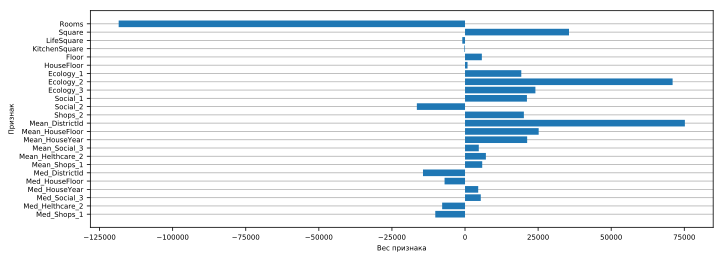

In [89]:
plt.rcParams.update({'font.size': 7})
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["axes.grid"] = True

plt.barh(X_train.columns, lr.coef_.flatten(), zorder=2)
plt.xlabel('Вес признака')
plt.ylabel('Признак')

fig = plt.gcf()
fig.set_size_inches(11.2, 4)
plt.gca().invert_yaxis()

In [90]:
def create_model(X_train, y_train, X_test, y_test, feats, model):
    print(1)
    model.fit(X_train.loc[:, feats], y_train)
    print(2)
    y_pred = model.predict(X_test.loc[:, feats])
    print(3)
    ret = mean_squared_error(y_test, y_pred), r2_score(y_test, y_pred)
    return ret

In [91]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

1
2
3


(2245581968.0455365, 0.7664119961416914)

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
from sklearn.model_selection import GridSearchCV

In [94]:
len(feats)

24

In [95]:
parameters = [{'n_estimators': [250, 300, 400],
               'max_features': np.arange(9, 18 + 1),
               'max_depth': np.arange(7, 11)}]

In [96]:
# parameters = [{'n_estimators': [250, 300, 350],
#                'max_features': [10, 12, 14, 16, 18, 20],
#                'max_depth': [9, 10, 11]}]

In [97]:
gscv = GridSearchCV(estimator=RandomForestRegressor(random_state=100),
                   param_grid=parameters,
                   scoring='r2',
                   cv=5,
                   verbose=2,
                   n_jobs=-1)

In [98]:
%%time
gscv.fit(X_train, pd.Series(y_train['Price']))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   53.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed: 19.0min finished


Wall time: 19min 12s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [250, 300, 400], 'max_features': array([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]), 'max_depth': array([ 7,  8,  9, 10])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [99]:
means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))

0.773 (+/-0.028) for {'max_depth': 7, 'max_features': 9, 'n_estimators': 250}
0.773 (+/-0.028) for {'max_depth': 7, 'max_features': 9, 'n_estimators': 300}
0.773 (+/-0.028) for {'max_depth': 7, 'max_features': 9, 'n_estimators': 400}
0.773 (+/-0.027) for {'max_depth': 7, 'max_features': 10, 'n_estimators': 250}
0.773 (+/-0.028) for {'max_depth': 7, 'max_features': 10, 'n_estimators': 300}
0.773 (+/-0.028) for {'max_depth': 7, 'max_features': 10, 'n_estimators': 400}
0.774 (+/-0.028) for {'max_depth': 7, 'max_features': 11, 'n_estimators': 250}
0.774 (+/-0.028) for {'max_depth': 7, 'max_features': 11, 'n_estimators': 300}
0.774 (+/-0.028) for {'max_depth': 7, 'max_features': 11, 'n_estimators': 400}
0.774 (+/-0.028) for {'max_depth': 7, 'max_features': 12, 'n_estimators': 250}
0.775 (+/-0.028) for {'max_depth': 7, 'max_features': 12, 'n_estimators': 300}
0.775 (+/-0.028) for {'max_depth': 7, 'max_features': 12, 'n_estimators': 400}
0.774 (+/-0.028) for {'max_depth': 7, 'max_features': 1

In [100]:
gscv.best_params_

{'max_depth': 10, 'max_features': 10, 'n_estimators': 400}

In [101]:
rfr = RandomForestRegressor(max_depth=gscv.best_params_['max_depth'],
                            max_features=gscv.best_params_['max_features'],
                            n_estimators=gscv.best_params_['n_estimators'],
                            random_state=130)

create_model(X_train_scaled, y_train['Price'], X_test_scaled, y_test, feats, rfr)

1
2
3


(2160673581.3707366, 0.775244263605728)

In [102]:
from sklearn.svm import SVR

In [103]:
svr = SVR(gamma='auto')

In [104]:
svr.fit(X_train_scaled, y_train['Price'])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [105]:
create_model(X_train_scaled, y_train['Price'], X_test_scaled, y_test, feats, svr)

1
2
3


(9881681763.699007, -0.027903835527545606)

In [106]:
c_vals = np.logspace(-2, 5, 29)
c_vals

array([1.00000000e-02, 1.77827941e-02, 3.16227766e-02, 5.62341325e-02,
       1.00000000e-01, 1.77827941e-01, 3.16227766e-01, 5.62341325e-01,
       1.00000000e+00, 1.77827941e+00, 3.16227766e+00, 5.62341325e+00,
       1.00000000e+01, 1.77827941e+01, 3.16227766e+01, 5.62341325e+01,
       1.00000000e+02, 1.77827941e+02, 3.16227766e+02, 5.62341325e+02,
       1.00000000e+03, 1.77827941e+03, 3.16227766e+03, 5.62341325e+03,
       1.00000000e+04, 1.77827941e+04, 3.16227766e+04, 5.62341325e+04,
       1.00000000e+05])

In [107]:
accuracy_test = []
accuracy_train = []

# for val in c_vals:
#     reg = SVR(C=val, gamma='auto')
#     reg.fit(X_train_scaled, y_train['Price'])
#     y_pred = svr.predict(X_test_scaled)
#     y_pred_train = svr.predict(X_train_scaled)
#     acc_test = r2_score(y_test, y_pred)
#     acc_train = r2_score(y_train, y_pred_train)
#     accuracy_test.append(acc_test)
#     accuracy_train.append(acc_train)
#     print('C = {}\n\tacc_valid = {} \n\tacc_train = {}\n'.format(val, acc_test, acc_train))
    

In [108]:
# plt.plot(c_vals, accuracy_test)
# plt.plot(c_vals, accuracy_train)
# plt.xlabel('Значение параметра C')
# plt.ylabel('Accuracy')
# plt.legend(['valid', 'train']);

In [109]:
from sklearn.manifold import TSNE

In [110]:
scaler = StandardScaler()

In [111]:
X_train_scaled = scaler.fit_transform(X_train)

In [112]:
X_test_scaled = scaler.transform(X_test)

In [113]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [114]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

In [115]:
type(X_train_scaled)

numpy.ndarray

In [116]:
type(X_test_scaled)

numpy.ndarray

In [117]:
X_train_tsne[:5, :]

array([[ 47.522594 ,  32.939407 ],
       [-65.77806  ,   3.4101024],
       [ -1.2687559, -86.80075  ],
       [-16.54669  , -45.624542 ],
       [-37.451935 , -11.180641 ]], dtype=float32)

In [118]:
X_train_tsne.shape

(7500, 2)

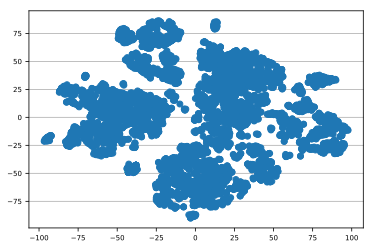

In [119]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], zorder=2);

In [120]:
from sklearn.cluster import KMeans

In [121]:
inertia_arr = []
inertia_range = range(2, 10)
for i in inertia_range:
    temp_model = KMeans(n_clusters=i, random_state=100)
    temp_model.fit(X_train_scaled)
    temp_inertia = temp_model.inertia_
    print(temp_inertia)
    inertia_arr.append(temp_inertia)

121639.04804796673
77851.66194172016
66219.45158242328
59334.81811972283
52196.113352623855
47525.8026767729
44680.15133322243
42322.52067144527


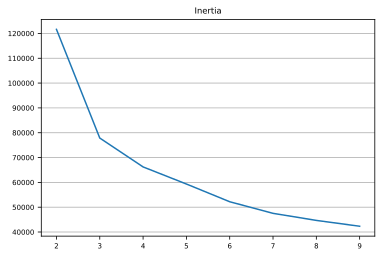

In [122]:
plt.plot(inertia_range, inertia_arr)
plt.title('Inertia');

In [123]:
kmeans = KMeans(n_clusters=7, n_init=10)

In [124]:
labels_train = kmeans.fit_predict(X_train_scaled)

In [125]:
pd.value_counts(labels_train)

4    2006
6    1693
1    1305
2    1231
0    1067
3     197
5       1
dtype: int64

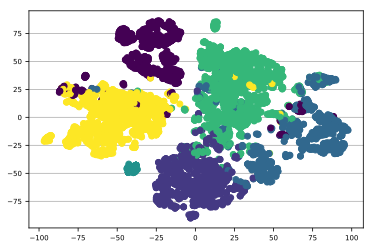

In [126]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train, zorder=2);

In [127]:
kmeans.inertia_

47525.833505286064

In [128]:
labels_test = kmeans.predict(X_test_scaled)

In [129]:
X_test_tsne = tsne.fit_transform(X_test_scaled)

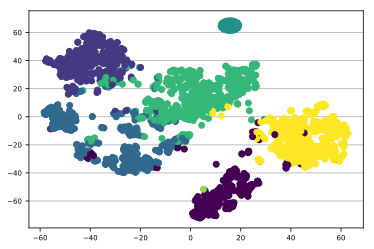

In [130]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test, zorder=2);

In [131]:
X_train['Cluster'] = pd.Series(labels_train).astype('category')
X_train = pd.get_dummies(X_train)
X_train.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
2294    2.0  45.070158   30.578690            5.0    3.0         5.0   
2808    1.0  38.899176   22.599499            8.0   14.0        16.0   
6480    3.0  89.078675   54.650864           10.0   15.0        16.0   
9202    3.0  67.997865   47.180308            7.0    3.0        12.0   
3111    1.0  40.354646   24.012685            6.0    2.0        14.0   

      Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Shops_2  \
2294   0.298205        1.0        1.0      16.0    4048.0      1.0   
2808   0.000000        1.0        1.0      36.0    6714.0      1.0   
6480   0.090799        1.0        1.0      74.0   19083.0      1.0   
9202   0.020741        1.0        1.0      24.0    5613.0      1.0   
3111   0.309479        1.0        1.0      35.0    7715.0      1.0   

      Mean_DistrictId  Mean_HouseFloor  Mean_HouseYear  Mean_Social_3  \
2294    206507.966738    197127.210562   194292.898964  203574.043662   
2808    173939.754319    176313.361369   174244.639739  183775.764475   
6480    319161.448221    334421.930176   374703.290802  314940.206627   
9202    355246.465697    277624.989935   247602.154120  354170.931449   
3111    223143.760670    170565.810445   160466.394681  178898.927289   

      Mean_Helthcare_2   Mean_Shops_1  Med_DistrictId  Med_HouseFloor  \
2294     234522.087314  239820.365654   222227.584211   189475.512032   
2808     139900.130332  156646.775271   181165.005575   179190.860677   
6480     370369.504781  310519.039028   324528.905814   342700.093963   
9202     302888.212215  308442.679803   335791.224854   271737.462605   
3111     139900.130332  191302.114082   220259.682189   169759.009428   

      Med_HouseYear   Med_Social_3  Med_Helthcare_2    Med_Shops_1  Cluster_0  \
2294  196525.085394  191608.853231    229878.897913  233742.556061          0   
2808  175154.505119  177231.702847    135165.504390  150670.977970          0   
6480  364669.603876  313095.275514    350803.231488  325053.371683          0   
9202  248433.745501  367412.420300    277669.542108  292514.701840          0   
3111  157820.741649  174918.255243    135165.504390  178285.555153          0   

      Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster_6  
2294          0          0          0          0          0          1  
2808          0          0          0          0          0          1  
6480          0          0          0          0          0          1  
9202          0          0          0          0          0          0  
3111          0          0          0          1          0          0

In [132]:
X_test['Cluster'] = pd.Series(labels_train).astype('category')
X_test = pd.get_dummies(X_test)
X_test.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Rooms     Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
9957    2.0  47.557663   31.239622            5.0    5.0         5.0   
1687    1.0  43.786486   22.442075            1.0    4.0         1.0   
2116    1.0  42.415606   42.415606            0.0    7.0        17.0   
231     3.0  82.353023   82.353023            0.0   13.0        17.0   
2780    1.0  38.683422   38.683422            1.0    8.0        17.0   

      Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  Shops_2  \
9957   0.225825        0.0        1.0      41.0    6558.0      1.0   
1687   0.017647        1.0        1.0       2.0     469.0      1.0   
2116   0.011654        1.0        1.0       4.0     915.0      1.0   
231    0.243205        1.0        1.0       5.0    1564.0      1.0   
2780   0.371149        1.0        1.0      34.0    7065.0      1.0   

      Mean_DistrictId  Mean_HouseFloor  Mean_HouseYear  Mean_Social_3  \
9957    199654.894984    197127.210562   194292.898964  209868.694480   
1687    122710.743033    162398.290168   140042.148811  138611.148993   
2116    122710.743033    148737.022819   140042.148811  138611.148993   
231     214231.902501    282951.555168   243661.760551  245046.346144   
2780    135415.767322    148737.022819   156857.968164  150430.335182   

      Mean_Helthcare_2   Mean_Shops_1  Med_DistrictId  Med_HouseFloor  \
9957     231270.371535  215974.415181   190884.574514   189475.512032   
1687     139900.130332  132379.287492   118327.090620   142140.159208   
2116     139900.130332  132379.287492   118327.090620   138139.165831   
231      248088.760507  229603.983350   215707.925347   255658.555074   
2780     172186.875144  170809.490952   130695.453501   138139.165831   

      Med_HouseYear   Med_Social_3  Med_Helthcare_2    Med_Shops_1  Cluster_0  \
9957  196525.085394  202534.202852    209152.784559  192801.049530          0   
1687  131457.715256  137782.941940    135165.504390  130266.805835          0   
2116  131457.715256  137782.941940    135165.504390  130266.805835          0   
231   225373.934571  231856.862246    228748.710803  215577.663951          0   
2780  143778.292734  146525.634013    160126.004016  164431.432310          0   

      Cluster_1  Cluster_2  Cluster_3  Cluster_4  Cluster_5  Cluster_6  
9957          0          0          0          0          0          0  
1687          0          0          0          0          0          1  
2116          0          0          0          1          0          0  
231           0          0          0          0          0          1  
2780          1          0          0          0          0          0

In [153]:
pd.value_counts(labels_train)

4    2006
6    1693
1    1305
2    1231
0    1067
3     197
5       1
dtype: int64

In [155]:
pd.value_counts(labels_test)

4    639
6    538
2    480
1    434
0    336
3     72
5      1
dtype: int64

In [160]:
X_train[X_train['Cluster_1'] == 1].shape

(956, 31)

In [133]:
feats = X_train.columns

In [134]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [135]:
X_train.shape, X_test.shape

((7500, 31), (2500, 31))

In [136]:
parameters = [{'n_estimators': [400, 450, 500],
               'max_features': np.arange(20, 25 + 1),
               'max_depth': np.arange(9, 15)}]

# parameters = [{'n_estimators': [400],
#                'max_features': [20],
#                'max_depth': [11]}]

In [137]:
gscv = GridSearchCV(estimator=RandomForestRegressor(random_state=100),
                   param_grid=parameters,
                   scoring='r2',
                   cv=5,
                   verbose=2,
                   n_jobs=-1)

In [138]:
%%time
gscv.fit(X_train, pd.Series(y_train['Price']))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  9.9min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 28.4min
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed: 46.8min finished


Wall time: 47min 16s


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=100, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [400, 450, 500], 'max_features': array([20, 21, 22, 23, 24, 25]), 'max_depth': array([ 9, 10, 11, 12, 13, 14])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=2)

In [139]:
means = gscv.cv_results_['mean_test_score']
stds = gscv.cv_results_['std_test_score']

for mean, std, params in zip(means, stds, gscv.cv_results_['params']):
    print('%0.3f (+/-%0.03f) for %r' % (mean, std * 2, params))

0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 20, 'n_estimators': 400}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 20, 'n_estimators': 450}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 20, 'n_estimators': 500}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 21, 'n_estimators': 400}
0.785 (+/-0.030) for {'max_depth': 9, 'max_features': 21, 'n_estimators': 450}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 21, 'n_estimators': 500}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 22, 'n_estimators': 400}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 22, 'n_estimators': 450}
0.785 (+/-0.029) for {'max_depth': 9, 'max_features': 22, 'n_estimators': 500}
0.785 (+/-0.030) for {'max_depth': 9, 'max_features': 23, 'n_estimators': 400}
0.785 (+/-0.031) for {'max_depth': 9, 'max_features': 23, 'n_estimators': 450}
0.785 (+/-0.031) for {'max_depth': 9, 'max_features': 23, 'n_estimators': 500}
0.785 (+/-0.030) for {'max_depth': 9, 'max_features'

In [140]:
gscv.best_params_

{'max_depth': 14, 'max_features': 20, 'n_estimators': 400}

In [141]:
rfr = RandomForestRegressor(max_depth=gscv.best_params_['max_depth'],
                            max_features=gscv.best_params_['max_features'],
                            n_estimators=gscv.best_params_['n_estimators'],
                            random_state=130)

create_model(X_train_scaled, y_train['Price'], X_test_scaled, y_test, feats, rfr)

1
2
3


(2120140974.5058103, 0.7794605117157858)

In [142]:
# rfr = RandomForestRegressor(max_depth=11,
#                             max_features=20,
#                             n_estimators=400,
#                             random_state=130)

# create_model(X_train_scaled, y_train['Price'], X_test_scaled, y_test, feats, rfr)

In [143]:
feats

Index(['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor',
       'Ecology_1', 'Ecology_2', 'Ecology_3', 'Social_1', 'Social_2',
       'Shops_2', 'Mean_DistrictId', 'Mean_HouseFloor', 'Mean_HouseYear',
       'Mean_Social_3', 'Mean_Helthcare_2', 'Mean_Shops_1', 'Med_DistrictId',
       'Med_HouseFloor', 'Med_HouseYear', 'Med_Social_3', 'Med_Helthcare_2',
       'Med_Shops_1', 'Cluster_0', 'Cluster_1', 'Cluster_2', 'Cluster_3',
       'Cluster_4', 'Cluster_5', 'Cluster_6'],
      dtype='object')

In [144]:
lr = LinearRegression()
# scaler = StandardScaler()

# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

# X_test_scaled = scaler.transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
# X_test_scaled

lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

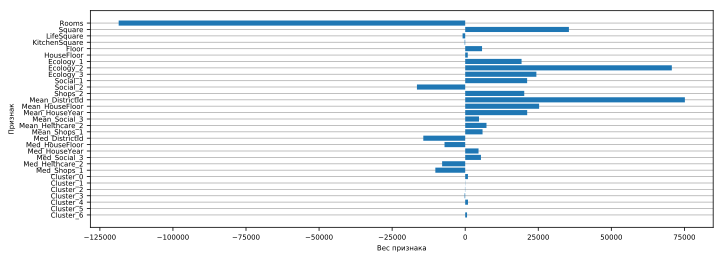

In [145]:
plt.rcParams.update({'font.size': 7})
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["axes.grid"] = True

plt.barh(X_train.columns, lr.coef_.flatten(), zorder=2)
plt.xlabel('Вес признака')
plt.ylabel('Признак')

fig = plt.gcf()
fig.set_size_inches(11.2, 4)
plt.gca().invert_yaxis()

In [146]:
create_model(X_train_scaled, y_train, X_test_scaled, y_test, feats, LinearRegression())

1
2
3


(2246915615.3167768, 0.7662732686276781)

In [147]:
time.strftime("Time: %H:%M:%S", time.gmtime(time.time() - start))

'Time: 01:11:14'